🔢 Class distribution:
Class
2    71
1    59
3    48
Name: count, dtype: int64
📊 First 5 lines:
   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline

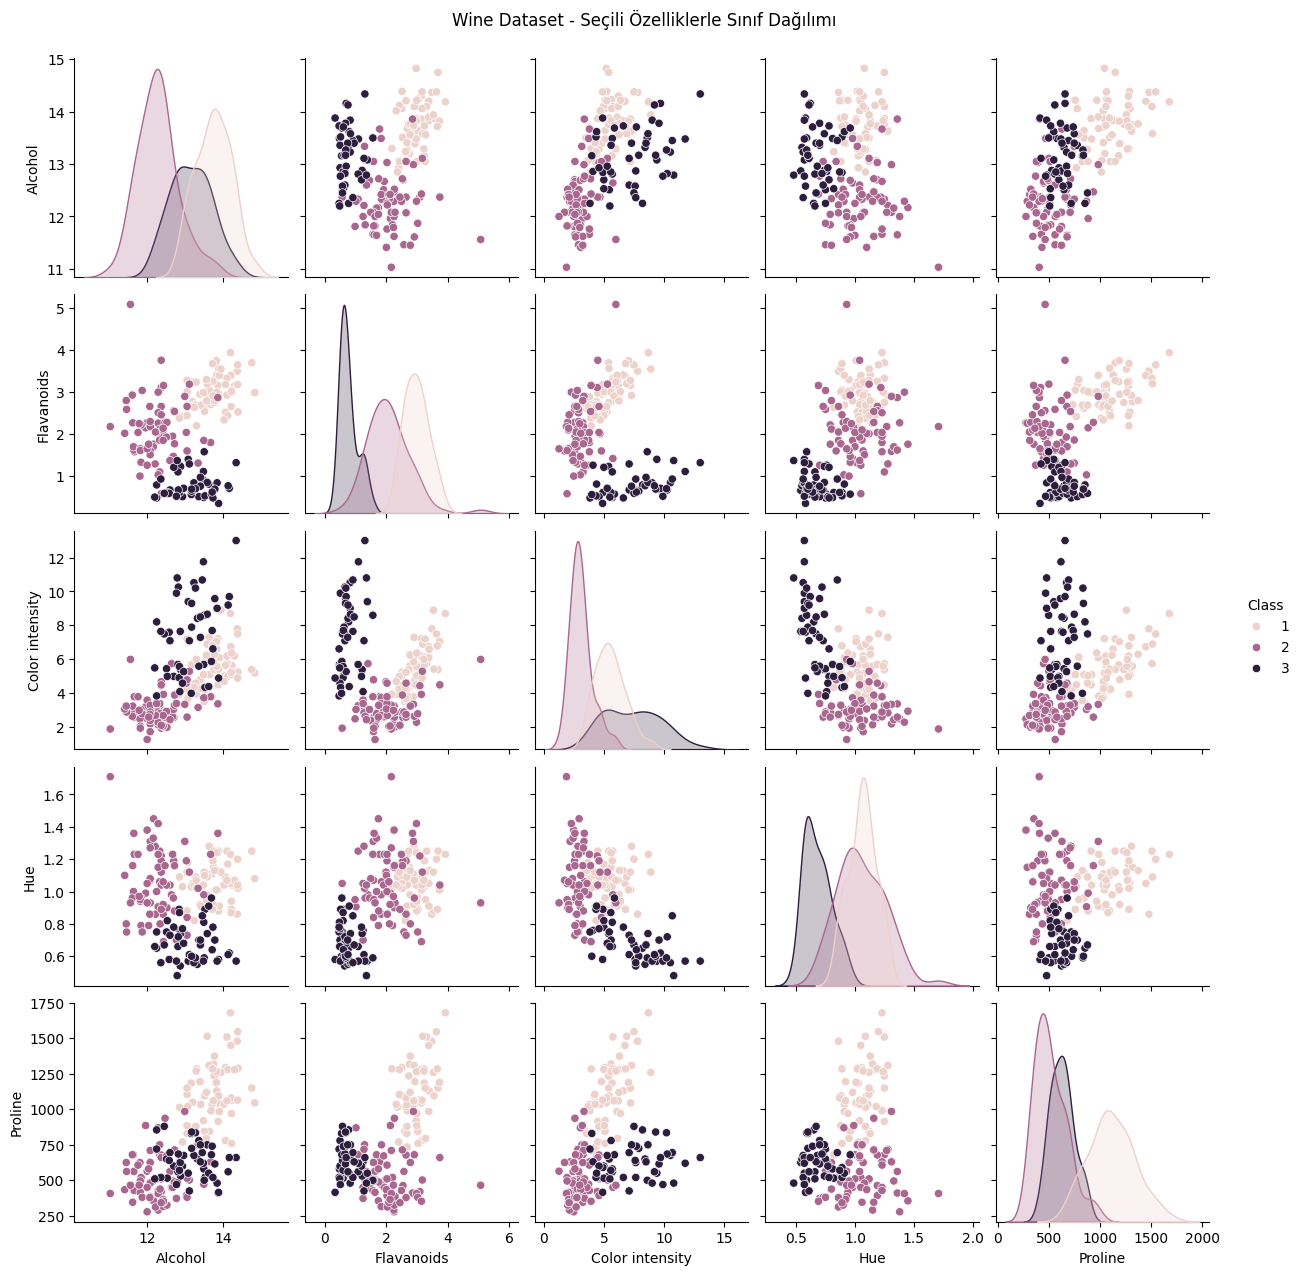


📌 Metric: EUCLIDEAN | K = 5
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 10]]


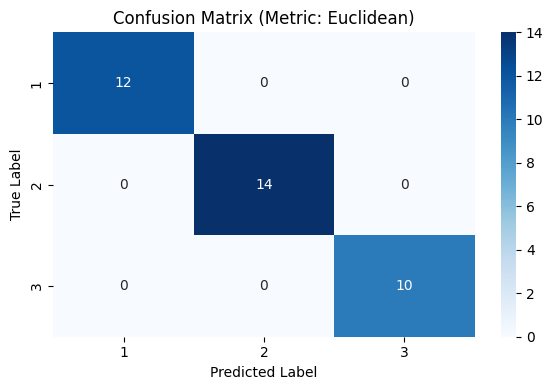


Classification Report:
    precision  recall  f1-score  support
1        1.0     1.0       1.0     12.0
2        1.0     1.0       1.0     14.0
3        1.0     1.0       1.0     10.0


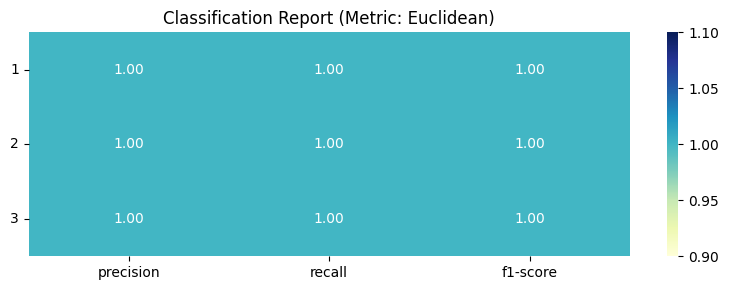


📌 Metric: MANHATTAN | K = 5
Confusion Matrix:
 [[12  0  0]
 [ 1 13  0]
 [ 0  0 10]]


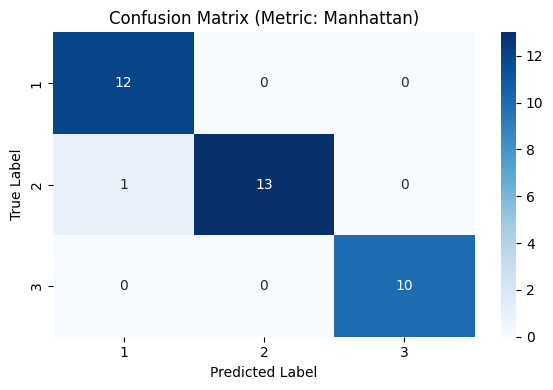


Classification Report:
    precision  recall  f1-score  support
1      0.923   1.000     0.960     12.0
2      1.000   0.929     0.963     14.0
3      1.000   1.000     1.000     10.0


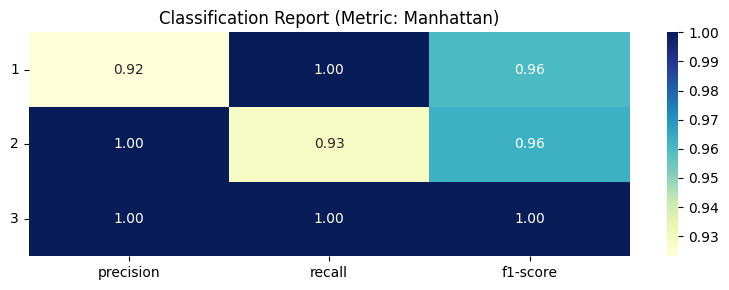


📌 Metric: MINKOWSKI | K = 5
Confusion Matrix:
 [[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]


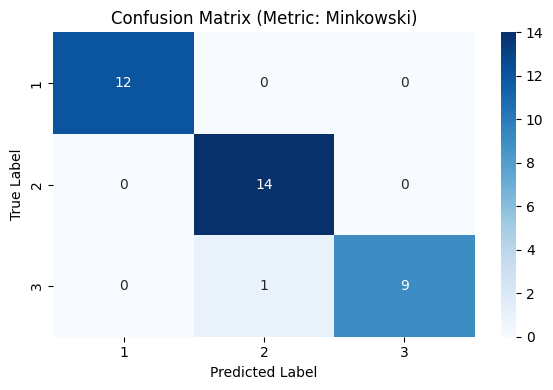


Classification Report:
    precision  recall  f1-score  support
1      1.000     1.0     1.000     12.0
2      0.933     1.0     0.966     14.0
3      1.000     0.9     0.947     10.0


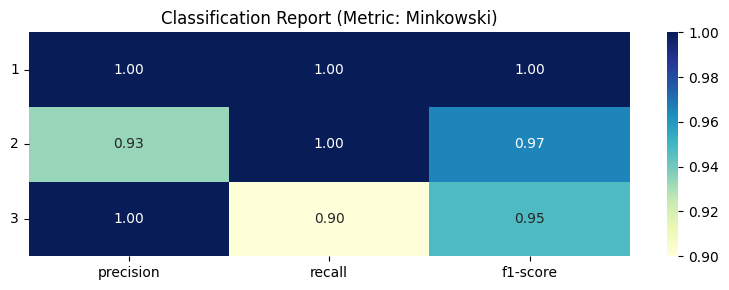

In [3]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Column names (from wine.names file)
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# File path (must be set according to the path on your own computer)
file_path = r"C:\Users\LENOVO\Homework 1\wine.data"
# Read the dataset
df = pd.read_csv(file_path, header=None, names=column_names)

print("🔢 Class distribution:")
print(df['Class'].value_counts())

# Print first few lines
print("📊 First 5 lines:")
print(df.head())

# Sınıf dağılımını yazdır
print("\n🔢 Class distribution:")
print(df['Class'].value_counts())

# 🔍 Önemli bazı özellikler (Class ile ayırt edilmesi kolay olanlar)
selected_features = ['Alcohol', 'Flavanoids', 'Color intensity', 'Hue', 'Proline']

# 🎨 Pairplot sadece bu özellikler için
sns.pairplot(df[selected_features + ['Class']], hue="Class", diag_kind="kde")
plt.suptitle("Wine Dataset - Seçili Özelliklerle Sınıf Dağılımı", y=1.02)
plt.show()

X = df.drop("Class", axis=1)
y = df["Class"]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def manhattan_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski_distance(x1, x2, p=3):
    return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

class KNN:
    def __init__(self, k=3, distance_metric="euclidean"):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = np.array(y)  # Fix

    def _distance(self, x1, x2):
        if self.distance_metric == "euclidean":
            return euclidean_distance(x1, x2)
        elif self.distance_metric == "manhattan":
            return manhattan_distance(x1, x2)
        elif self.distance_metric == "minkowski":
            return minkowski_distance(x1, x2, p=3)
        else:
            raise ValueError(f"Bilinmeyen metrik: {self.distance_metric}")

    def predict(self, X):
        return np.array([self._predict_instance(x) for x in X])

    def _predict_instance(self, x):
        distances = [self._distance(x, train_x) for train_x in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest = [self.y_train[i] for i in k_indices]
        return Counter(k_nearest).most_common(1)[0][0]

ks = [5] #We choose a constant k for analysis
metrics = ["euclidean", "manhattan", "minkowski"]

for metric in metrics:
    print(f"\n📌 Metric: {metric.upper()} | K = {ks[0]}")
    
    model = KNN(k=ks[0], distance_metric=metric)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test, preds)
    print("Confusion Matrix:\n", cm)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.title(f"Confusion Matrix (Metric: {metric.title()})")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

    # --- Classification Report ---
    report = classification_report(y_test, preds, output_dict=True)
    report_df = pd.DataFrame(report).transpose().drop(['accuracy', 'macro avg', 'weighted avg'])

    print("\nClassification Report:\n", report_df.round(3))

    plt.figure(figsize=(8, 3))
    sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap="YlGnBu", fmt=".2f", cbar=True)
    plt.title(f"Classification Report (Metric: {metric.title()})")
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()